In [1]:
import pickle
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

multi_lexsum = load_dataset("allenai/multi_lexsum", name="v20230518")
modified_dataset = multi_lexsum["test"].filter(lambda x: x["summary/short"] != None)

Using the latest cached version of the module from /home/keddie/.cache/huggingface/modules/datasets_modules/datasets/allenai--multi_lexsum/25f8c77cc9ee8964b4f704053bf8f7c4200cdf89570308008a0dba01d0faf545 (last modified on Wed Mar  6 22:30:31 2024) since it couldn't be found locally at allenai/multi_lexsum., or remotely on the Hugging Face Hub.


In [6]:
aux = modified_dataset.map(lambda x: {"len": len(x["sources"])})["len"]

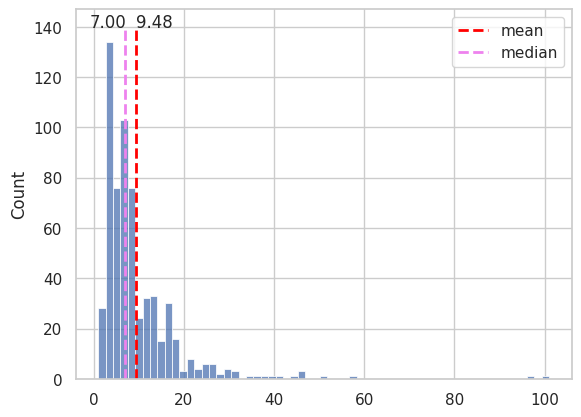

In [36]:
# number of documents in a docket
sns.set_theme(style = "whitegrid")

sns.histplot(x = aux)
plt.vlines(x = np.mean(aux), ymin = 0, ymax = 140, colors = "red", linestyles = "--", linewidth = 2, label = "mean")
plt.vlines(x = np.median(aux), ymin = 0, ymax = 140, colors = "violet", linestyles = "--", linewidth = 2, label = "median")
plt.text(x = np.mean(aux), y = 140, s = f"{np.mean(aux):0.2f}")
plt.text(x = np.median(aux) - 8, y = 140, s = f"{np.median(aux):0.2f}")

plt.legend()

plt.show()